> **Jupyter slideshow:** This notebook can be displayed as slides. To view it as a slideshow in your browser, type the following in the console:


> `> jupyter nbconvert [this_notebook.ipynb] --to slides --post serve`


> To toggle off the slideshow cell formatting, click the `CellToolbar` button, then `View --> Cell Toolbar --> None`.

<img src="https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png" style="float: left; margin: 15px;">

## Principal Component Analysis (PCA)

_Author: Kiefer Katovich (SF) _

---

### Learning Objectives

After this lesson, you will be able to:

- Describe what principal component analysis (PCA) does and what it’s used for in data science.
- Understand key terms, including PCA, eigenvalues, eigenvectors, and principal components.
- Practice computing PCA manually.
- Interpret PCA results graphically.

### Lesson Guide
- [Motivation](#motivation)
- [What is PCA?](#whatispca)
    - [Eigenvalues and Eigenvectors](#eigenpairs)
    - [Principal Components](#pcs)
- [Manual PCA Code Along](#manual-codealong)
    - [1) Basic EDA](#basic-eda)
    - [2) Subset and Normalize](#subset)
    - [3) Find the Correlation Matrix](#corr)
    - [4) Eigenvalues and Eigenvectors](#eigen)
    - [5) Explained Variance](#var)
    - [6) Projection Matrix W](#projection)
    - [7) Transformed Matrix Z](#transformed)
    - [8–12) Plot and Interpret Principal Components](#plot-components)
- [Further Reading](#further-reading)

<a id="motivation"></a>
## Motivation

Dimensionality reduction decreases the number of random variables that will be considered for analysis until you’re left with the most important ones.

Dimensionality reduction is not an end goal in itself but is instead a tool to form a data set with optimized features for further visualization and/or modeling.

To get a quick summary of our data, we can calculate a covariance matrix — an unstandardized correlation matrix.

The diagonal elements in a covariance matrix show us the variance of each of our features.

The off-diagonal elements show the covariance, the amount of collinearity, and the redundancy between our variables.

**What would an “ideal” covariance matrix look like?**

An ideal covariance matrix for data would have large numbers (variances) along the diagonal, which would indicate a large amount of signal in the data. It would also have zero values in the off-diagonal elements, as these values indicate redundancy across our variables.

**What can we do to try to remove any redundancies and preserve the signal?**

We can use PCA!

<a id="whatispca"></a>
## What is Principal Component Analysis (PCA)?

---

While dimensionality reduction can be a large piece of random forests using a **feature selection** approach, which you've already explored in previous lessons, we're going to focus on a form of dimensionality reduction known as **principal component analysis** or **PCA** that uses **feature extraction**. 

Whereas feature selection attempts to discover relevant subsets of the original data, feature extraction combines key features of a potentially correlated dataset resulting in a new  more linear non-correlated dataset with fewer features.

PCA is the quintessential dimensionality reduction algorithm.  

_Dimensionality reduction_ is the process of combining or collapsing the existing features (columns in $x$) into fewer features. 

This hopefully:

- Retains the signal in the original data.
- Reduces noise.

---

PCA finds the linear combinations of your current predictor variables that create new principal components. These explain (in order) the maximum possible amount of variance in your predictors.

A more natural way of thinking about PCA is that **it transforms the coordinate system so that the axes become the most concise, informative descriptors of our data as a whole.**

The old axes are the original variables (columns). The new axes are the principal components from PCA.


### The Process of PCA 

---

Say we have a matrix, $X$, of predictor variables. PCA gives us the ability to transform our $X$ matrix into a new matrix, $Z$. 

First, we’ll derive a **weighting matrix**, $W$, from the correlational/covariance structure of $X$. This allows us to perform the transformation.

Each successive dimension (column) in $Z$ will be ranked and ordered according to the variance in its values.

**Two assumptions that PCA makes include:**

1) **Linearity:** The data do not hold nonlinear relationships.
2) **Large variances define importance:** The dimensions are constructed to maximize the remaining variance.

The resulting principal components (columns of $Z$) will be uncorrelated. This makes PCA a useful pre-processing step for algorithms requiring uncorrelated input features.


### Eigenvalues and Eigenvectors

---

![eigenvalue](./images/eigenvalue.png)

![orthogonal eigenvectors](./images/eigenvectors_orthogonal.png) 

![transformed XY](./images/transformed_xy.png) 

<a id="eigenpairs"></a>
**Eigenvectors**

An eigenvector specifies a direction through the original coordinate space. The eigenvector with the highest corresponding eigenvalue is the first principal component.

---

**Eigenvalues**

Eigenvalues indicate the amount of variance in the direction of its corresponding eigenvector. The larger the eigenvalue, the more variance (information) in our data its corresponding eigenvector explains.

---

**Every eigenvector has a corresponding eigenvalue.** These are sometimes called **eigenpairs**.

![PCA coord transform](./images/pca_coordinate_transformation.png) 

<a id="pcs"></a>
### Principal Components

---

**Principal components are the vectors that define the new coordinate system for your data.** Transforming your original data columns onto the principal component axes constructs new variables that are optimized to explain as much variance as possible and be independent (uncorrelated).

Creating these variables is a well-defined mathematical process. In essence, **each component is created as a weighted sum of your original columns, such that all components are orthogonal (perpendicular) to each other**.

**Principal Component Transformation of Data: PC1 vs. PC2**

[setosa.io has a nice interactive visualization for PCA](http://setosa.io/ev/principal-component-analysis/).

---

![setosa pc1](./images/setosa_pc1.png) 

### Why Would We Want to Perform PCA?

---

- We can reduce the number of dimensions (remove less important components) while losing mostly noise rather than signal.
- Because we’re assuming our variables are interrelated (at least in the sense that, together, they explain a dependent variable), the information of interest should exist along directions with the largest variance.
- The directions of largest variance should have the highest signal-to-noise ratio.
- Correlated predictor variables (also referred to as redundancy of information) are combined into independent variables. Our predictors from PCA are guaranteed to be independent.

---

[A good paper on PCA](http://arxiv.org/pdf/1404.1100.pdf).

[An informational site on performing PCA](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#pca-vs-lda).

<a id="manual-codealong"></a>
## Manual PCA Code Along

---

**Manual PCA Steps**

1) **Standardize data:** Centering is required. Full normalization is nice for future visuals.
2) **Calculate eigenvectors and eigenvalues:** Do this from the correlation or covariance matrix.
3) **Sort eigenvalues:** Choose eigenvectors that correspond to the largest eigenvalues. The number you choose is up to you, but we will take two for the sake of visualization here.
4) **Construct the projection weighting matrix, $W$:** Do this from the eigenvectors.
5) **Transform the original data set, $X$, with $W$:** Obtain the new two-dimensional transformed matrix, $Z$.

---

**Data**

We're going to be using a simple 75-row, four-column data set with demographic information. It contains:

    Age (limited to 20–65).
    Income
    Health (A rating on a scale from one–100, where 100 is the best health).
    Stress (A rating on a scale from one–100, where 100 is the most stressed).
    
All of the variables are continuous.

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set_style('white')

demo = pd.read_csv('./datasets/simple_demographics.csv')

<a id="basic-eda"></a>
### 1) Basic EDA.

Create a Seaborn regplot for each:

1) Age versus income.
2) Age versus health.
3) Age versus stress.

Also make a pair plot of the entire data set.

---

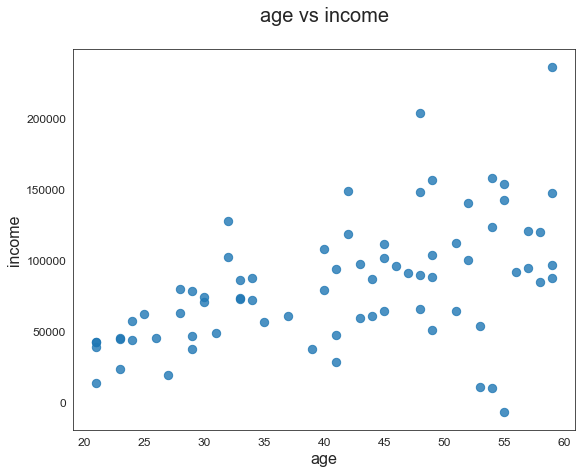

In [2]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()

ax = sns.regplot('age', 'income', data=demo, fit_reg=False, scatter_kws={'s':70}, ax=ax)
ax.set_ylabel('income', fontsize=16)
ax.set_xlabel('age', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('age vs income\n', fontsize=20)

plt.show()

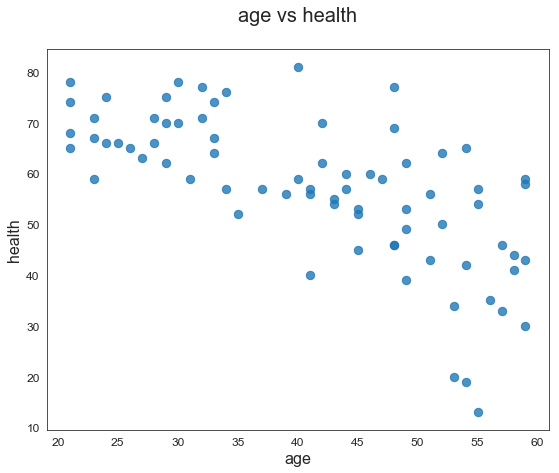

In [3]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot('age', 'health', data=demo, fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_ylabel('health', fontsize=16)
ax.set_xlabel('age', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('age vs health\n', fontsize=20)

plt.show()

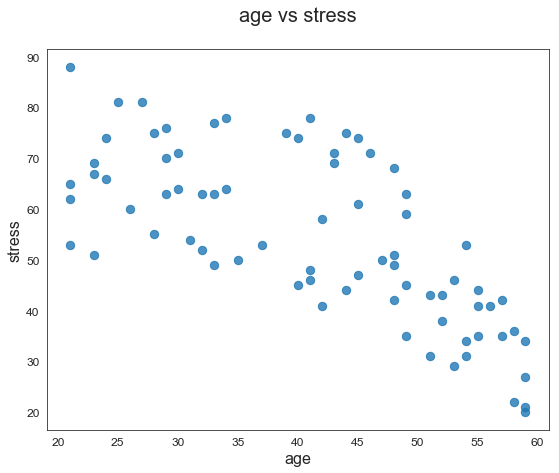

In [4]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot('age', 'stress', data=demo, fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_ylabel('stress', fontsize=16)
ax.set_xlabel('age', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('age vs stress\n', fontsize=20)

plt.show()

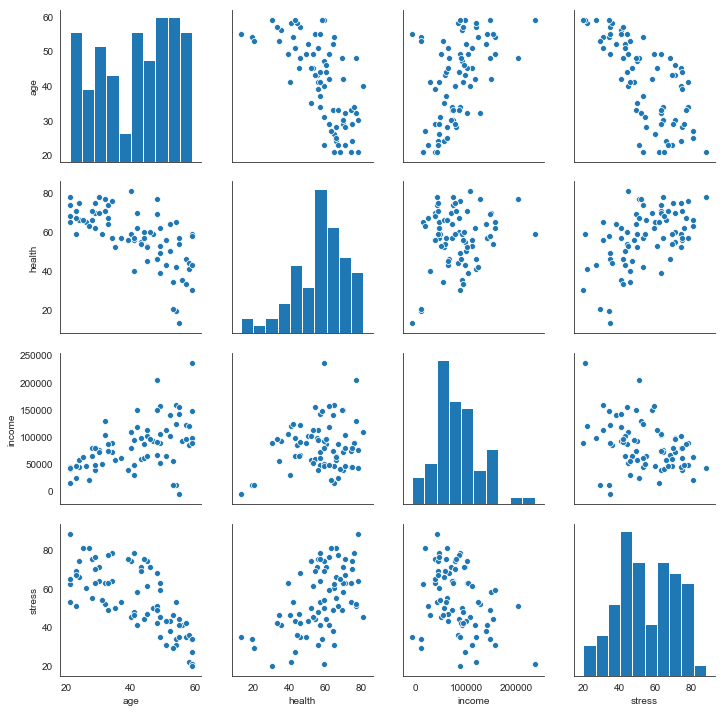

In [5]:
sns.pairplot(demo)

<a id="subset"></a>
### 2) Subset and normalize.

Subset the data to only include:

    Income
    Health
    Stress

We'll be comparing the principal components to age specifically, so we're leaving it out here.

---

In [6]:
demo_noage = demo[['health','income','stress']]
demo_noage = (demo_noage - demo_noage.mean()) / demo_noage.std()

<a id="corr"></a>
### 3) Calculate the correlation matrix.

We'll be using the correlation matrix to calculate the eigenvectors and eigenvalues.

---

In [7]:
demo_noage_corr = np.corrcoef(demo_noage.values.T)
demo_noage.corr()

,health,income,stress
health,1.000000,0.192037,0.527663
income,0.192037,1.000000,-0.347925
stress,0.527663,-0.347925,1.000000


<a id="eigen"></a>
### 4) Calculate the eigenvalues and eigenvectors from the correlation matrix.

NumPy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)
    
---

In [9]:
eig_vals, eig_vecs = np.linalg.eig(demo_noage_corr)

print(eig_vals)
print(eig_vecs)

[0.26996948 1.55645677 1.17357375]
[[ 0.59525118 -0.6187659  -0.5126449 ]
 [-0.46791364  0.25173885 -0.84716255]
 [-0.65324793 -0.74414804  0.13968116]]


<a id="var"></a>
### 5) Calculate and plot the explained variance.

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component:

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

---

In [11]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)

[ 51.88189228  91.00101735 100.        ]


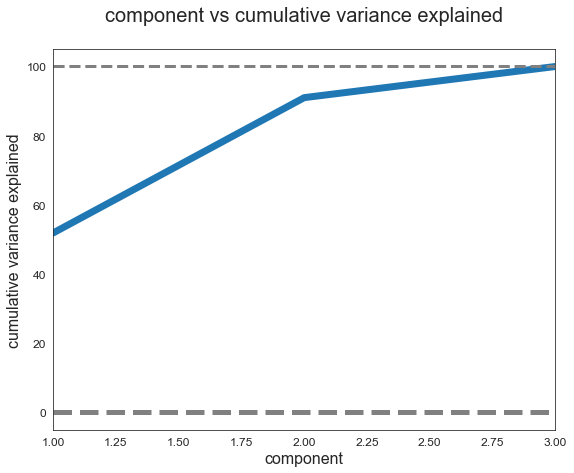

In [12]:
plt.figure(figsize=(9,7))

component_number = [1,2,3]

plt.plot(component_number, cum_var_exp, lw=7)

plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')


ax = plt.gca()
ax.set_xlim([1,3])
ax.set_ylim([-5,105])

ax.set_ylabel('cumulative variance explained', fontsize=16)
ax.set_xlabel('component', fontsize=16)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('component vs cumulative variance explained\n', fontsize=20)

plt.show()

<a id="projection"></a>
### 6) Construct the projection matrix, $W$.

This is simply a matrix of our top two eigenvectors.

The eigenvectors are concatenated as columns.

1) Start by ordering the eigenvectors from largest to smallest by their corresponding eigenvalues.
- Concatenate the eigenvectors together. `np.hstack()` is useful for this.

---

In [13]:
value_vector_pairs = [[eig_vals[i], eig_vecs[:,i]] for i in range(len(eig_vals))]
value_vector_pairs.sort(reverse=True)

In [14]:
weight_2d_projection = np.hstack((value_vector_pairs[0][1].reshape(eig_vecs.shape[1],1),
                                  value_vector_pairs[1][1].reshape(eig_vecs.shape[1],1)))

print('Weight data 2d PCA projection matrix:\n', weight_2d_projection)

Weight data 2d PCA projection matrix:
 [[-0.6187659  -0.5126449 ]
 [ 0.25173885 -0.84716255]
 [-0.74414804  0.13968116]]


<a id="transformed"></a>
### 7) Construct the transformed two-dimensional matrix, $Z$.

To do this, we take the dot product of our three-dimensional demographic matrix, $X$, with the projection matrix, $W$.

---

In [15]:
Z = demo_noage.dot(weight_2d_projection)

<a id="plot-components"></a>
### 8) Plot Principal Component 1 (PC1) vs. Principal Component 2 (PC2).

Principal Component 1 is the first column in $Z$ and Principal Component 2 is the second.

Notice how they are uncorrelated.

---

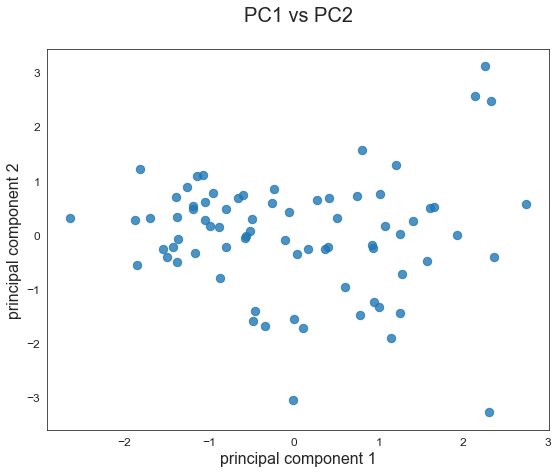

In [16]:
fig = plt.figure(figsize=(9,7))

ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], Z.iloc[:,1],
                 fit_reg=False, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('principal component 2', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs PC2\n', fontsize=20)

plt.show()


### 9) Plot age vs. PC1 with regplot.

Notice how tight the relationship is. Principal Component 1 took the shared variance out of income, health, and stress, which are directly related to increasing age. 

This principal component, or more specifically the column-weighting matrix $W$, is essentially **capturing the latent age variance embedded in these variables.**


---

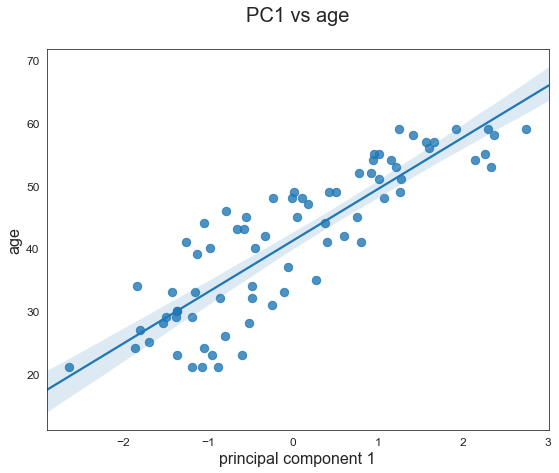

In [17]:
fig = plt.figure(figsize=(9,7))
ax = fig.gca()
ax = sns.regplot(Z.iloc[:,0], demo.age.values,
                 fit_reg=True, scatter_kws={'s':70}, ax=ax)

ax.set_xlabel('principal component 1', fontsize=16)
ax.set_ylabel('age', fontsize=16)


for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12) 
    
ax.set_title('PC1 vs age\n', fontsize=20)

plt.show()

### 10) Concatenate PC1 and PC2 to the full demographic (four-dimensional) data set, then melt it with PC1, PC2, and the index variables.

1) Renormalize so that all four variables are on the same scale.
2) Remember the Pandas melt code:

```python
melted_df = pd.melt(df, id_vars=['PC1','PC2'])
```

---

In [18]:
demo_pcs = demo.copy()

demo_pcs = (demo - demo.mean()) / demo.std()

demo_pcs['PC1'] = Z.iloc[:,0]
demo_pcs['PC2'] = Z.iloc[:,1]

In [19]:
demo_pcs = pd.melt(demo_pcs, id_vars=['PC1','PC2'])

In [20]:
demo_pcs.head()

,PC1,PC2,variable,value
0,-0.882350,0.150070,age,-1.701609
1,-0.104542,-0.102205,age,-0.692750
2,-1.372329,-0.496715,age,-0.944964
3,-0.867671,-0.797774,age,-0.776821
4,1.566225,-0.491018,age,1.324968


### 11) Use `lmplot` to view PC1 versus all four variables.

Make the `col` keyword argument and the `hue` keyword argument "variable,” assuming that's what you called them in the melt command (those are the defaults).

Make `col_wrap = 2` and `size = 7`, or something similar, to make it visually appealing.  

---

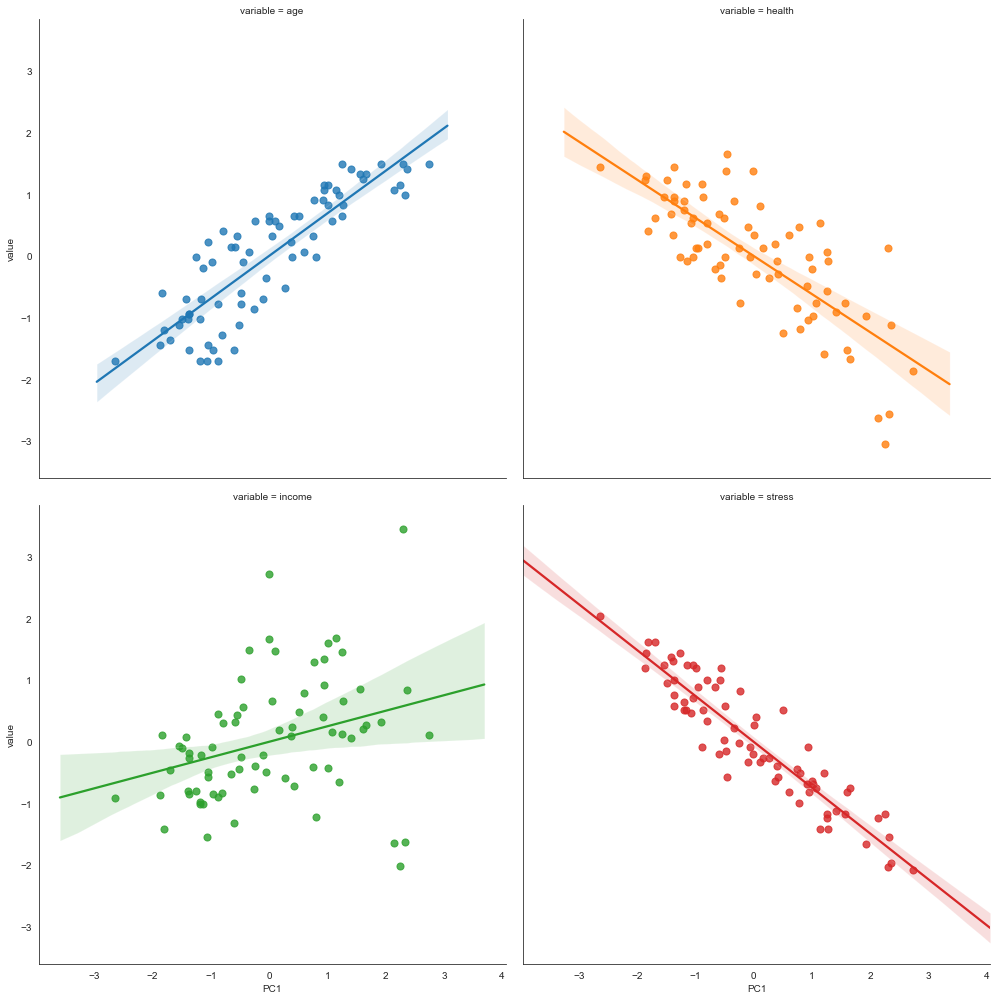

In [22]:
pc1 = sns.lmplot(x="PC1", y="value", col="variable", hue="variable", 
                 data=demo_pcs, col_wrap=2, height=7, scatter_kws={'s':50})


### 12) Use `lmplot` to do the same for PC2.

Notice how PC2 captures the variance of income, which was not captured well by PC1. This makes sense, as the variance each principal component captures has to be orthogonal to the other components.

---

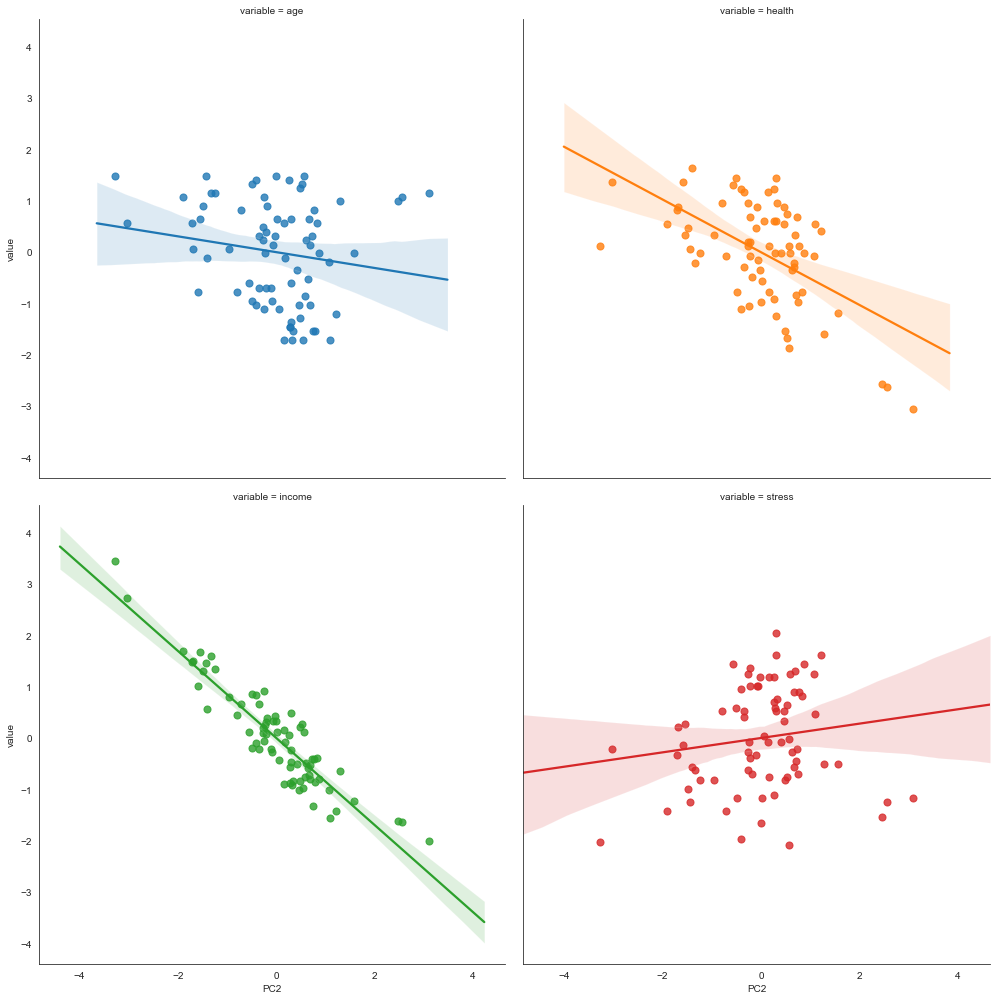

In [23]:
pc2 = sns.lmplot(x="PC2", y="value", col="variable", hue="variable", 
                 data=demo_pcs, col_wrap=2, height=7, scatter_kws={'s':50})

<a id="more-reading"></a>
### More Useful Links, Reading, and References for Images

---

- [PCA 4 Dummies](https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/)

- [Stack Overflow: Making Sense of PCA](http://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues)

- [PCA and Spectral Theorem](http://stats.stackexchange.com/questions/217995/what-is-an-intuitive-explanation-for-how-pca-turns-from-a-geometric-problem-wit)

- [PCA in Three Steps: Eigendecomposition and SVD](http://sebastianraschka.com/Articles/2015_pca_in_3_steps.html#pca-vs-lda)

- [Tutorial on PCA](http://arxiv.org/pdf/1404.1100.pdf)

- [PCA Math and Examples](http://www.stat.cmu.edu/~cshalizi/uADA/12/lectures/ch18.pdf)